**Задание 1**

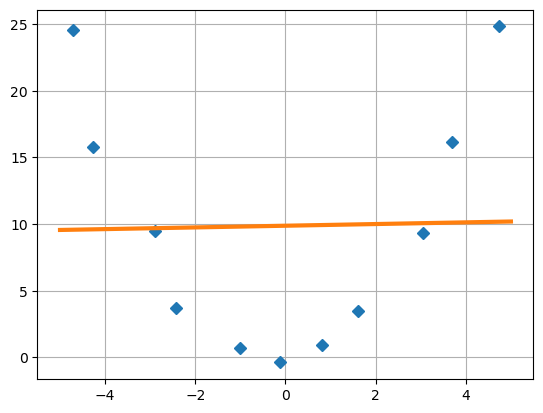

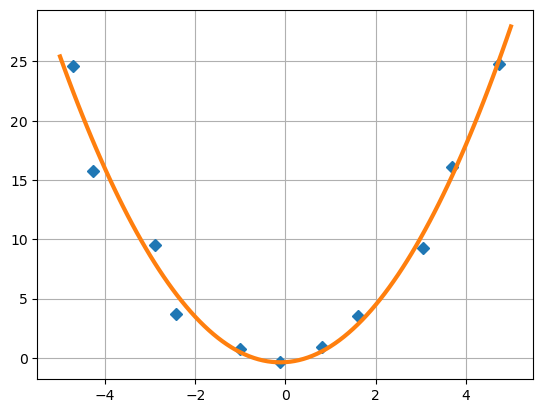

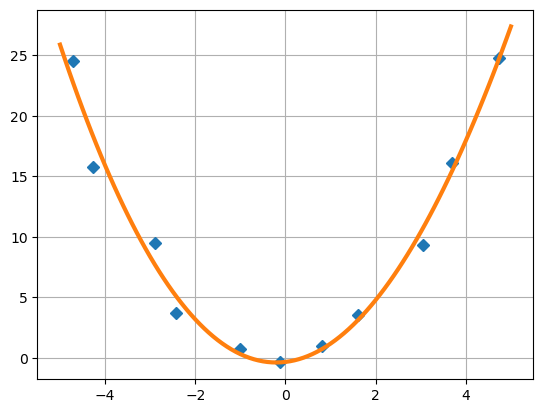

In [21]:
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt

delta = 1.0
x = np.linspace(-5,5,11)
y = x**2 + delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

# Нахождение коэффициентов функции вида y = ax + c методом наим.квадратов
# Задаем вектор m = [x, x, E]
m = np.vstack((x, np.ones(len(x)))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5, 5]
x_prec = np.linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида
plt.plot(x_prec,s[0] * x_prec + s[1], '-', lw=3)
plt.grid()
plt.show()

# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наим.квадратов
# Задаем вектор m = [x ** 2, x, E]
m = np.vstack((x**2, x, np.ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида
plt.plot(x_prec,s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=3)
plt.grid()
plt.show()


# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наим.квадратов
# Задаем вектор m = [x ** 3, x, E]
m = np.vstack((x**3, x**2, x, np.ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec **2 + s[2]*x_prec + s[3], '-', lw=3)
plt.grid()
plt.show()

**Задание 2**

[0.95719622 2.04113746]
6.055300866433539e-05
0.14002528324211708


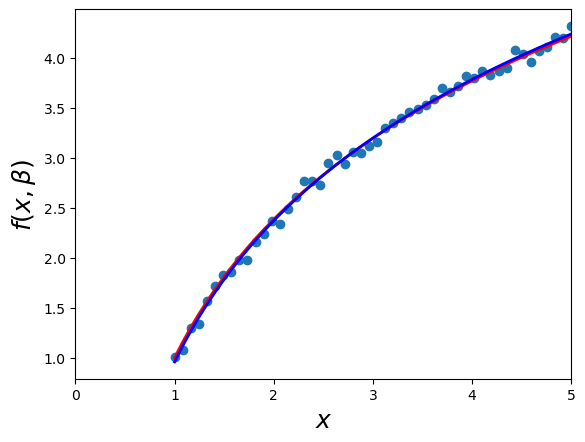

In [42]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt


#решение #3
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
# зададим массив точек xі
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots() 
ax.scatter(xdata, ydata) 
ax.plot(xdata, y, 'r', lw=2) 
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(0, 5) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()



**Задание 3**

(30, 2)


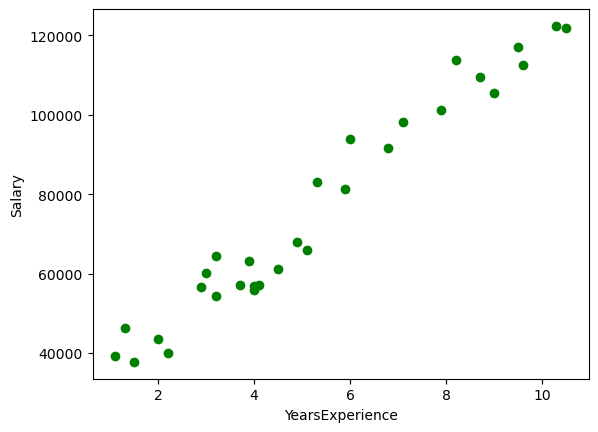

26780.099150628186
[9312.57512673]


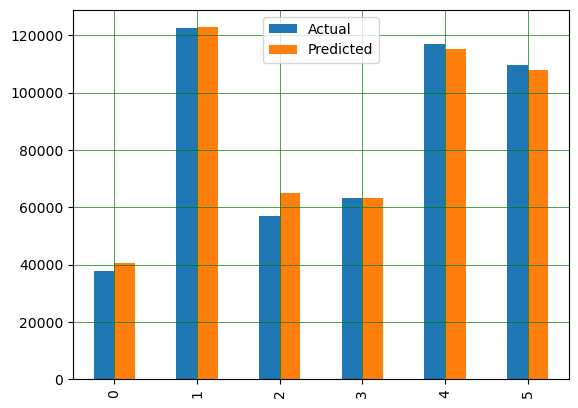

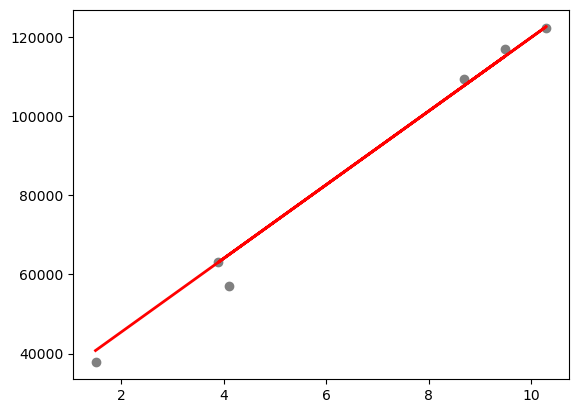

In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pandas import DataFrame, Series 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)

print(dataset.shape)
dataset.describe()

plt.scatter (dataset['YearsExperience'], dataset['Salary'], color = 'g')
plt.xlabel("YearsExperience")
plt.ylabel("Salary") 
plt.show()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)


y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df
# визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green') 
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test, color='gray') 
plt.plot(X_test, y_pred, color='red', linewidth=2) 
plt.show()

**Задание 4**

In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

url = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
df = pd.read_csv(url)

x = df[['Average_income','Population_Driver_licence(%)','Petrol_Consumption']]
y = df['Petrol_tax']

# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
#для обучения алгоритма мы выполняем тот же код, что и раньше, используя метoд fit() клаcca LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
#выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)
print()
#Чтобы сделать прогнозы на тестовых данных
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
print()
#Последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя значения для MSE 

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

                              Coefficient
Average_income                  -0.000282
Population_Driver_licence(%)     4.513605
Petrol_Consumption              -0.005763

    Actual  Predicted
29     9.0   7.745885
4      8.0   8.466001
26     8.0   7.789398
30     7.0   7.634500
32     8.0   8.033229
37     7.0   7.102528
34     8.0   8.010238
40     7.0   7.801928
7      8.0   7.973379
10     8.0   7.425299

Mean Squared Error: 0.3222702495042146


**Задание 5**

0.9999999999999998 -0.6666666666666657
[[3.  1. ]
 [3.2 1. ]
 [3.4 1. ]
 [3.6 1. ]
 [3.8 1. ]
 [4.  1. ]]


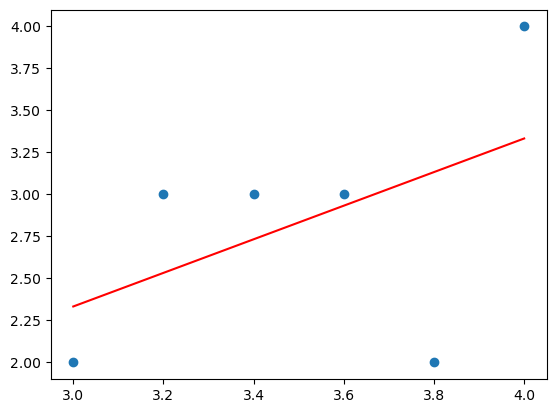

[[ 9.    3.    1.  ]
 [10.24  3.2   1.  ]
 [11.56  3.4   1.  ]
 [12.96  3.6   1.  ]
 [14.44  3.8   1.  ]
 [16.    4.    1.  ]]


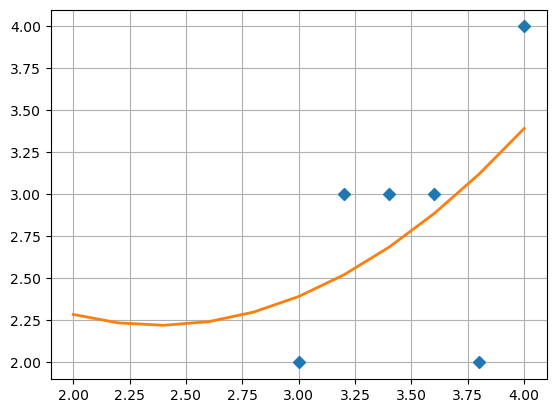

In [53]:
import numpy as np
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt

x = [3.0, 3.2, 3.4, 3.6, 3.8, 4.0]
y = [2.0, 3.0, 3.0, 3.0, 2.0, 4.0]

new_y=np.array(y)
new_x=np.array(x)
A=np.vstack([new_x,np.ones(len(new_x))]).T
m,c= np.linalg.lstsq(A,new_y,rcond=None)[0]
print(m,c)

A = np.vstack([new_x,np.ones(len(new_x))]).T
print(A)
plt.plot(new_x, new_y, 'o')
plt.plot(new_x, m*new_x + c,'r')
plt.show()


m = vstack((new_x**2, new_x, ones(6))).T
s = np.linalg.lstsq(m, new_y, rcond=None)[0]
print(m)
x_prec = linspace(2, 4, 11)
plt.plot(new_x, new_y,'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1]*x_prec + s[2],'-', lw=2)
plt.grid()
